# Quick tour in numpy and matplotlib

In this notebook we give a basic overview of the numpy and matplotlib libraries.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Some useful functions of `numpy` to generate arrays:
 * np.arange(xmin, xmax, step)
 * np.linspace(xmin, xmax, npoints)
 * np.ones(length)
 * np.zeros(length)
 
Clearly `numpy` also supports all the math functions you might expect. 
In any case, you can always write your own function ;)

Let's say we want to generate some points from 0.0 to 2.0, in steps of 0.025.
To do so we can use the `np.arange()` method. We can also compute the value of
the function $ f(x)\, =\, 1+\sin(2\pi x)$.

In [2]:
x = np.arange(0.0, 2.0, 0.025) 
y = 1 + np.sin(2 * np.pi * x)

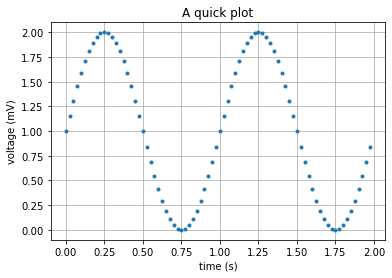

In [3]:
fig, ax = plt.subplots()
## the last argument here simply sets the marker
ax.plot(x, y, '.') 

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='A quick plot')
ax.grid()

plt.show()

## Quicker tour into fitting with [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Now that we have learnt how to use numpy and how to plot, let's try to fit the data we have created above.

First of all, we need to import `curve_fit` from `optimize` of `scipy` :

In [4]:
from scipy.optimize import curve_fit

Whenever you want to have some information about a function, you can use the `help()` method. It is quite verbose, but you will get a clear printout of how a method works.

In [5]:
#help(curve_fit)

First of all, let's add some noise to our data. Every time we have to deal with real-world data, we always have to take into account some source of noise. Hence, we add a random normal fluctuation to our `f(x)` values. Here we use a gaussian smearing of 0.1$\sigma$. You can try to play around with this parameter and see what happens.

In [6]:
y = y + np.random.normal(0, 0.1, len(x))

Next step: we have to define a function for the fit. `curve_fit` will compute the difference between the expected function at each one of the $\left\lbrace x_{i}\right\rbrace$ and the $\left\lbrace y_{i}\right\rbrace$ values we registered. We define `sinf` with two free parameter:
 * A: the normalisation parameter of `np.sin()`;
 * b: the multiplicative factor of `x`.

In [7]:
def sinf(x, A, b):
    return 1.0 + A*np.sin(b*x)

`curve_fit` expects 3 arguments:
 * The fit function, in our case `sinf`;
 * The `x` and `y` arrays of data;
 * In this case we also use the `p0` argument, 
     which sets an initial guess for the fit free parameters.

For more options (such as including uncertainties to the fit and boundaries on the fit free parameters) you can have a look at the [`curve_fit` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [8]:
popt, pcov = curve_fit(sinf, x, y, p0 = [1.0, 6.])

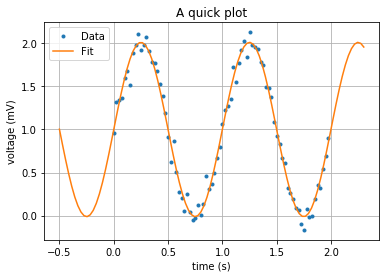

In [9]:
fig, ax = plt.subplots()
## the last argument here simply sets the marker
ax.plot(x, y, '.', label = 'Data') 
ax.plot(np.linspace(-0.5, 2.3, 100), sinf(np.linspace(-0.5, 2.3, 100), *popt), '-', label = 'Fit')

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='A quick plot')
ax.grid()
ax.legend()
plt.show()

Let's have a look at the fit results:
 * `popt`: Optimal values for the parameters so that the sum of the squared residuals of `f(xdata, *popt) - ydata` is minimized;
 * `pcov`: The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use `perr = np.sqrt(np.diag(pcov))`.

In [10]:
perr = np.sqrt(np.diag(pcov))
print('Fit parameters: A = %.2f, b = %.2f' %(popt[0], popt[1]))
print(r'Fit uncertainties: $\sigma_{A}$ = %.2f, $\sigma_{b}$ = %.2f' %(perr[0], perr[1]))

Fit parameters: A = 1.01, b = 6.29
Fit uncertainties: $\sigma_{A}$ = 0.01, $\sigma_{b}$ = 0.01


## Histograms and fit

In this section we give a quick look to histograms, binning and something more about fitting.
There are two main methods you can use in python to deal with a histogram (i.e. a binned series):
 * `plt.hist(series, bins)`: you use this method in case you want to plot directly the histogram. This methods returns `n`, the values of the histogram bins, `bins`, the edges of the bins and `patches`, silent list of individual patches used to create the histogram or list of such list if multiple input datasets.
 * `np.hisogram(series, bins)`: compute the histogram of a set of data. This method returns `hist`, the values of the histogram and `bin_edges`, the bin edges `(length(hist)+1)`.

In the following we generate some normal distributions and we fit with a user-defined gaussian function, using the `curve_fit` method shown above. Let's start by defining the `gaussian` function:

In [25]:
def gaussian(x, A, sigma, mu):
    return A/(sigma * np.sqrt(2 * np.pi))*np.exp( - (x - mu)**2 / (2 * sigma**2) )

Now we create an array of $10^6$ random numbers, generated according to a normal distribution. Then we create two histograms using both `plt.hist()` and `np.histogram()`.

In [27]:
gaus_val = np.random.normal(0.0, 0.05, 10000000)

In [28]:
vals = [g*np.exp(-1.5*g**2) for g in gaus_val]

In [29]:
# t = plt.hist(vals, bins = np.linspace(-0.3, 0.3, 100))

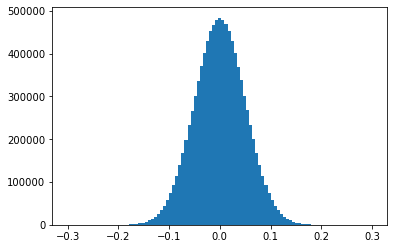

In [30]:
n, bins, patches = plt.hist(gaus_val, bins = np.linspace(-0.3, 0.3, 100))
hist, bin_edges  = np.histogram(gaus_val, bins = np.linspace(-0.3, 0.3, 100))

Calling `plt.hist` automatically plots the histogram of the series we are providing to this method. Hence, sometime is better to use `np.hisogram`, if you do not want the plots to appear and make your notebook longer and longer. Also note that it is preferable to assing `plt.hist()` to a variable, otherwise you also get the printout of all the contents in each bin. For example, try to run:

In [31]:
# plt.hist(gaus_val, bins = np.linspace(-0.3, 0.3, 100))

It is also worth to mention that the bins edges returned by the two methods have length larger than the values of the histogram. Hence we need to remove the overflow bin when we want to plot `bins` vs `n` (or `bin_edges` vs `hist`):

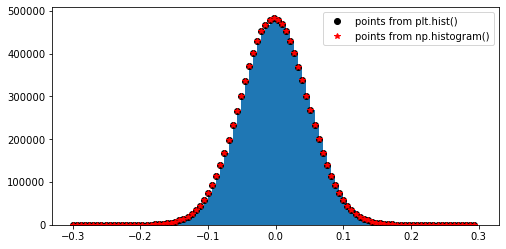

In [32]:
plt.figure(figsize=(8,4))
t = plt.hist(gaus_val, bins = np.linspace(-0.3, 0.3, 100))
plt.plot(bins[:-1], n, 'ko', label = 'points from plt.hist()')
plt.plot(bin_edges[:-1], hist, 'r*', label = 'points from np.histogram()')
plt.legend()

Last but not least, the bins edges above do not correspond to the bins centers. This is why in the plot above, the points are not aligned with the histogram. Let's define the bin centers and then use these points to fit the above distribution with a gaussian:

In [33]:
bins = (bins[:-1] + bins[1:])/2
bin_edges = (bin_edges[:-1] + bin_edges[1:])/2

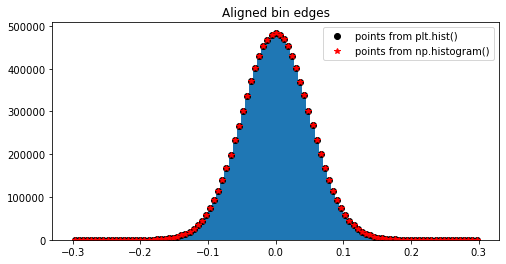

In [34]:
plt.figure(figsize=(8,4))
plt.title('Aligned bin edges')
t = plt.hist(gaus_val, bins = np.linspace(-0.3, 0.3, 100))
plt.plot(bins, n, 'ko', label = 'points from plt.hist()')
plt.plot(bin_edges, hist, 'r*', label = 'points from np.histogram()')
plt.legend()

Same as above: least squares fit using curve_fit.
In this case the $\left\lbrace x_i \,,\,y_i\right\rbrace$ points used for the fit are
the bin centers and the entries in each bin $\left\lbrace bins_i \,,\,n_i\right\rbrace $.
We also set some initial guess (`p0`) for the fit free parameters: In particular we use
the maximum bin content for the normalisation constant `A` and the median of the bins centers
for the mean `mu`.


In [38]:
popt, pcov = curve_fit(gaussian, bins, n)#, p0 = [n.max(), np.median(bins), 0.05])

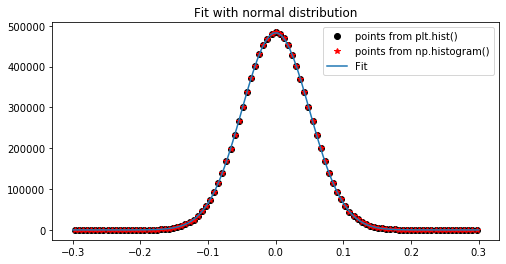

In [39]:
plt.figure(figsize=(8, 4))
plt.title('Fit with normal distribution')
plt.plot(bins, n, 'ko', label = 'points from plt.hist()')
plt.plot(bin_edges, hist, 'r*', label = 'points from np.histogram()')
plt.plot(np.linspace(-0.3, 0.3, 100), gaussian(np.linspace(-0.3, 0.3, 100), *popt), '-', label = 'Fit')
plt.legend()